**Уровень 0**  
***Задание 1***  
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

**Решение:**  
Вероятность выпадания орла находится по формуле Бернулли: $P_{k,n}=C_n^k\cdot p^k \cdot q^{n-k}$, где:  
$C_n^k = \frac{n!}{k!(n-k)!}$ - биномиальный коэффициент  
$n = 15$ - кол-во испытаний;  
$k$ - кол-во испытаний, в которых наступило ожидаемое событие;  
$p = \frac{1}{2}$ - вероятность события при 1 испытании;  
$q = 1 - p = \frac{1}{2}$ - обратная вероятность.  
Таким образом, в зависимости от простого числа орлов k, вероятность выпадения будет рассчитываться по формуле:  
$P_{k}=\frac{15!}{k!(15-k)}\cdot \frac{1}{2^k}\cdot \frac{1}{2^{15-k}}=\frac{15!}{k!(15-k)!2^{15}}$.

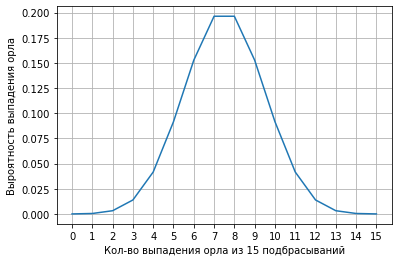

In [1]:
import math
from scipy import special
import matplotlib.pyplot as plt

def bern(n, k, p):
    return special.comb(n, k, exact=True) * p ** k * (1 - p) ** (n - k)

n = 15
p = 1 / 2
x = [x for x in range(0, 16)]
y = []
for k in x:
    y.append(bern(n, k, p))

plt.plot(x, y)
plt.xlabel("Кол-во выпадения орла из 15 подбрасываний")
plt.ylabel("Выроятность выпадения орла")
plt.xticks(x)
plt.grid()

***Задание 2***  
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

Среднее: 29.792, медиана: 30.0, дисперсия: 142.09673599999994

Проверка (средствами numpy):
Среднее: 29.792, медиана: 30.0, дисперсия: 142.09673599999996


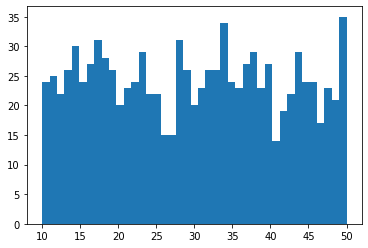

In [2]:
import numpy as np

def get_mean(lst):
    s = 0
    for val in lst:
        s += val
    return s / len(lst)

def get_median(lst):
    srt = sorted(lst)
    n = len(srt) // 2 
    if len(srt) % 2 == 1:
        return srt[n]
    else:
        return (srt[n] + srt[n - 1]) / 2
    
def get_disp(lst):
    mean = get_mean(lst)
    s = 0
    for val in lst:
        s += (mean - val) ** 2
    return s / len(lst)
    
vals = np.random.randint(low=10, high=51, size=1000)
print(f"Среднее: {get_mean(vals)}, медиана: {get_median(vals)}, дисперсия: {get_disp(vals)}")
print("\nПроверка (средствами numpy):")
print(f"Среднее: {np.mean(vals)}, медиана: {np.median(vals)}, дисперсия: {np.var(vals)}")
plt.hist(vals, bins=len(np.unique(vals)))
plt.show()

**Уровень 1**  
***Задание 3***  

Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:  
𝐴1  - монеты 1 и 2 упали одной и той же стороной,  
𝐴2  - монеты 2 и 3 упали одной и той же стороной,  
𝐴3  - монеты 1 и 3 упали одной и той же стороной.  

Покажите, почему эти 3 события являются попарно независимыми, но не являются независимыми в совокупности.

**Решение:**
Вероятности каждого из событий:  
$P(A_1)=P(A_2)=P(A_3)=\frac 12$.  

Вероятность совместного появления 2-х событий:  
$P(A_1 \cap A_2)=P(A_2 \cap A_3)=P(A_1 \cap A_3)=\frac 14$.  

Произведения вероятностей соответствующих событий:  
$P(A_1) \cdot P(A_2) = P(A_2) \cdot P(A_3) = P(A_1) \cdot P(A_3) = \frac 14$.  

События $A_i$ попарно независимые, т.к. выполняются:  
$P(A_1 \cap A_2) = P(A_1) \cdot P(A_2)$,  
$P(A_2 \cap A_3) = P(A_2) \cdot P(A_3)$,  
$P(A_1 \cap A_3) = P(A_1) \cdot P(A_3)$.  

Для $A_1 \cap A_2 \cap A_3$, если какие-то 2-х события произошли, то произошло и 3-е, поэтому:  
$P(A_1 \cap A_2 \cap A_3) = \frac14$.

Произведение вероятностей всех событий:  
$P(A_1) \cdot P(A_2) \cdot P(A_3) = \frac 18$  

Условие независимости в данном случае не выполняется:  
$P(A_1 \cap A_2 \cap A_3) \neq P(A_1) \cdot P(A_2) \cdot P(A_3)$.

***Задание 4 (формула полной вероятности)***  
В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

**Решение:**  
Обозначим получение продукции каждого предприятия как событие $B_i$. Тогда вероятности событий $B_i$:  
$P(B_1)=0,2$,  
$P(B_2)=0,3$,  
$P(B_3)=0,5$.  

По условию задачи вероятность нахожения качественного товара A на каждом предприятии своя, т.е:  
$P(A|B_1)=0,1$,  
$P(A|B_2)=0,05$,  
$P(A|B_3)=0,2$  

Важно заметить, что: $\sum_{n=1}^{3}{P(B_i)} = 1$, а, значит, события $B_i$ образуют полную группу и можно воспользоваться формулой полной вероятности:  
$P(A)=\sum_{n=1}^{3}{P(A|B_i) \cdot P(B_i)}$.  

Тогда:  
$P(A)=0,1 \cdot 0,2 + 0,05 \cdot 0,3 + 0,2 \cdot 0,5 = 0,135 = 13,5\%$.